In [4]:
!ls ../data

100_200_3.dat  cpp_100_350.dat	    last_run.txt      vm_run_5_100.dat
200_250_3.dat  cpp_5_100.dat	    python_5_100.dat
250_300_3.dat  fastpythonRuns.dat   pythonRuns.dat
3_100_3.dat    fpython_100_350.dat  test.dat


In [29]:
dfc

,jacobi,armadillo
n,,
5,0.000165,0.000166
5,0.000132,0.000015
5,0.000129,0.000013
5,0.000124,0.000012
5,0.000129,0.000011
10,0.000673,0.000047
10,0.000669,0.000041
10,0.000632,0.000047
10,0.000637,0.000036


In [31]:
# %load post_process.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATADIR = '../data/'
PLOTDIR = '../figures/'

# df = pd.read_csv('../data/test.dat',index_col=0, header=0)

dfs = []
files = []
cp = (DATADIR+'cpp_5_100.dat')
# files.append(DATADIR+'cpp_100_350.dat')
filename =  (DATADIR+'python_5_100.dat')
# files.append(DATADIR+'fpython_100_350.dat')

dfc = pd.read_csv(cp, index_col=0, header=0)

df = pd.read_csv(filename, index_col=0, header=0)
df['c++'] = dfc['jacobi']
df['rel speed Numba'] = df['python']/df[' numba']
df['rel speed Cython'] = df['python']/df[' cython']
df['rel speed c++'] = df['python']/df['c++']


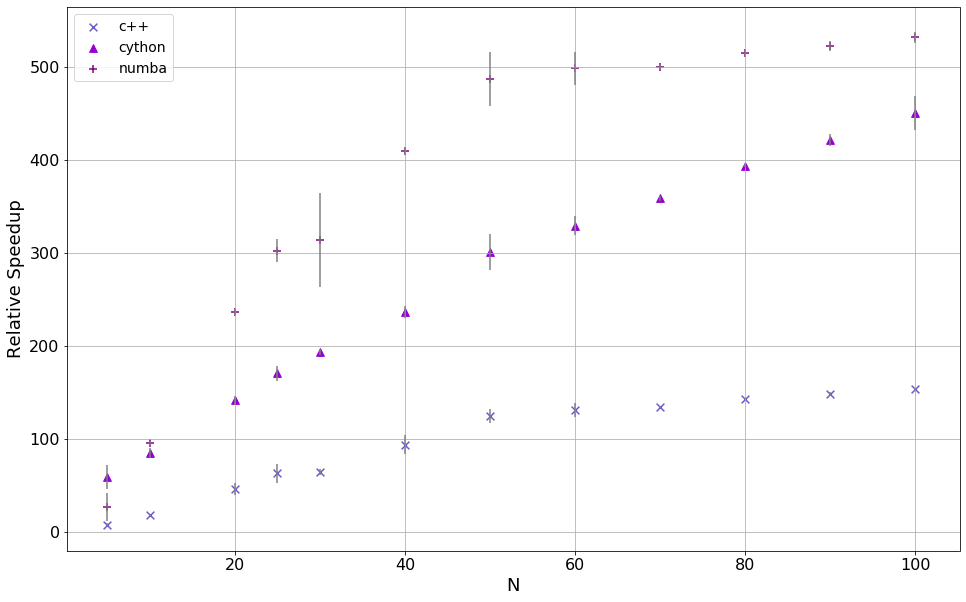

In [83]:
import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)


a = np.unique(df['rel speed c++'].keys())
plt.figure(figsize=(16,10))
for key in a:
    plt.errorbar(key,df['rel speed c++'][key].mean(), df['rel speed c++'][key].std(), color ='grey')
    plt.scatter(key,df['rel speed c++'][key].mean(), marker = 'x', s=60,color = 'slateblue')
    plt.errorbar(key,df['rel speed Cython'][key].mean(), df['rel speed Cython'][key].std(), color ='grey')
    plt.scatter(key,df['rel speed Cython'][key].mean(), marker = '^',s=60, color = 'darkviolet')
    plt.scatter(key,df['rel speed Numba'][key].mean(), marker = '+', s=60 ,color = 'purple')
    plt.errorbar(key,df['rel speed Numba'][key].mean(), df['rel speed Numba'][key].std(), color ='grey')
# plt.title('Average Speedup compared to Python', )
plt.legend(('c++', 'cython', 'numba'), prop={'size': 14})
plt.xlabel('N', fontsize=18)
plt.ylabel('Relative Speedup',fontsize=18)
plt.savefig(PLOTDIR+'avgspeed.png',dpi =140)
plt.grid()

In [30]:
ro = df['rel speed Numba']

ro.gr
# df['rel speed Cython'].rolling(5).mean().plot()

n
5             NaN
10      45.467447
20     124.291397
25     248.444623
30     313.333153
40     325.737377
50     421.233874
60     498.587808
70     495.965443
80     502.370639
90     517.885050
100    523.926138
Name: rel speed Numba, dtype: float64

In [5]:
# Groupby same index in case of data containing several runs for each n
df = df.groupby(level=0).mean()
print(df)


pydf = pd.read_csv(DATADIR+'pythonRuns.dat', index_col=0, header=0)

print(pydf)


# Iterations divided by n**2
(df['iterations']/df.index**2).plot()
plt.grid()
plt.savefig(PLOTDIR + 'iterations_compare_n2.png')

# Find value that iterations/n**2 converges to
mean = (df.loc[200:,'iterations']/df.loc[200:,'iterations'].index**2).mean()
print('Mean: {}'.format(mean))

# Number of iterations
plt.clf()
df['iterations'].plot(label='Iterations')
plt.plot(df.index, mean*df.index**2, label='{:.3f}n^2'.format(mean),linestyle='--')
plt.grid()
plt.ylabel('Iterations')
plt.legend()
plt.savefig(PLOTDIR+'iterations.png')
plt.clf()



plt.clf()
(df['jacobi']/df['armadillo']).plot(loglog=True)#loglog=True)
plt.grid()
plt.savefig(PLOTDIR+'compare_arma_cpp.png')
# plt.plot(df.index, df.index**(16/12.))
# plt.show()

FileNotFoundError: [Errno 2] File b'../data/fpython_100_350.dat ' does not exist: b'../data/fpython_100_350.dat '